# Import software libraries and load the dataset #

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,ReLU
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

# Load the fashion mnist dataset

- Dataset provided from keras.
- Print the number of training images and testing images.
- Print the number of labels (unique).

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Dataset provided from keras.
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [5]:
(train, train_la), (test, test_la) = fashion_mnist.load_data()

In [6]:
# Print the number of training images and testing images.
print('Training data shape :', train_images.shape, train_labels.shape)
print('Testing data shape  :', test_images.shape, test_labels.shape)

Training data shape : (60000, 28, 28) (60000,)
Testing data shape  : (10000, 28, 28) (10000,)


In [7]:
# Print the number of labels (unique).
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# What is the shape of each image?

In [8]:
print((train_images[1]).shape)

(28, 28)


# The labels are encoded, find the name of each encoded label.

In [9]:
labels = {0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

In [10]:
def labels_fun(num):
  for key, value in labels.items() :
    if key == num:
      return value

# Plot 25 samples from the dataset

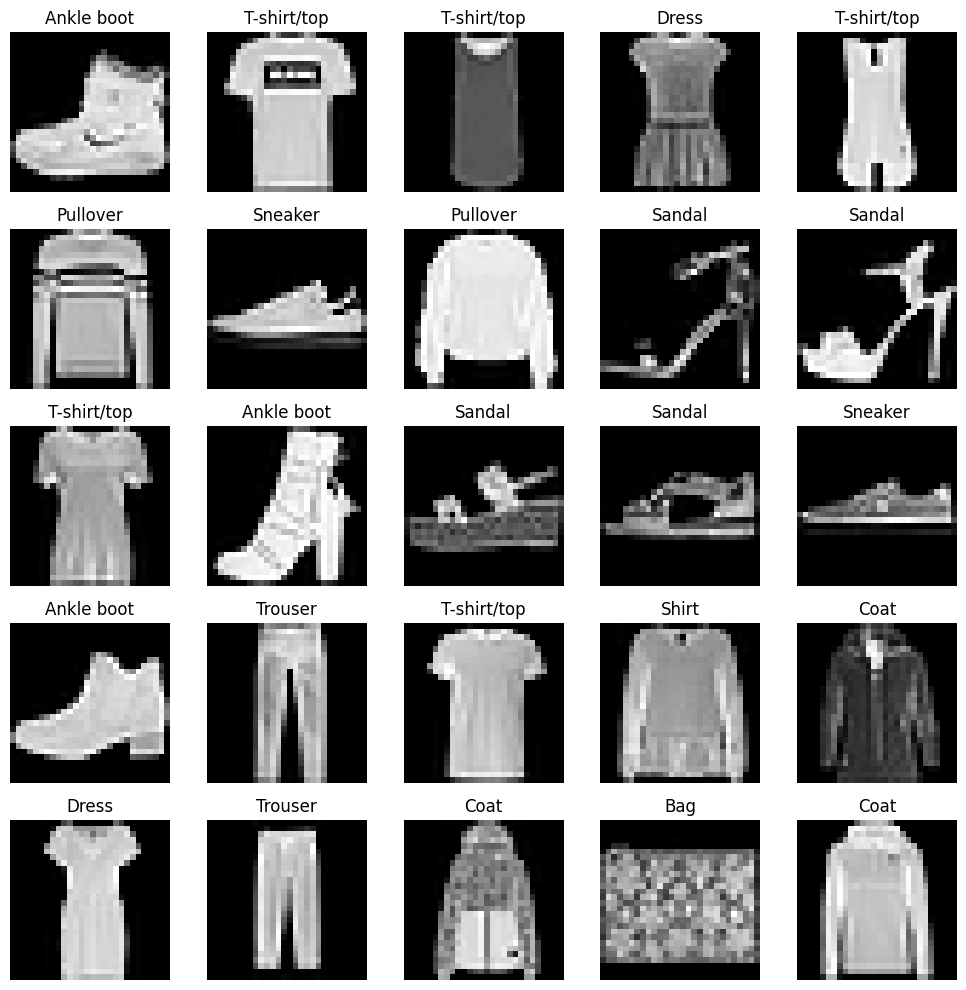

In [11]:
fig, axes = plt.subplots(5,5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    index = i*5 + j # Calculate the index of the current image
    axes[i, j].imshow(train[index, :, :], cmap='gray') # Plot the image
    axes[i, j].set_title(labels_fun(train_la[index])) # Set the title
    axes[i, j].axis('off') # Optional: Turn off axis labels

plt.tight_layout() # Adjust the layout of subplots
plt.show()

# Prepare the data for training with Keras

- Hint : Use reshape method.
- Do not forget the one hot encoding process (use the method provided from keras).

In [12]:
# train_data = train_images.reshape(-1, 28, 28, 1)
# test_data = test_images.reshape(-1, 28, 28, 1)
nRows, nCols, nDims = 28, 28, 1

In [13]:
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
train_data = train_data.astype('float32')
print('train data shape :', train_data.shape)

test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
test_data = test_data.astype('float32')
print('test data shape  :', test_data.shape)

input_shape = (nRows, nCols, nDims)

train data shape : (60000, 28, 28, 1)
test data shape  : (10000, 28, 28, 1)


In [14]:
train_data = train_data / 255
test_data /= 255

In [15]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Split the datasets into training and testing

- Hint : Use the training set (training and validation sets).
- Do not worry about the testing set provided from the dataset we will get with later on, do not touch it!!

In [16]:
train_images, val_images, train_labels, val_labels = train_test_split(train_data, train_labels_one_hot, test_size=0.2, random_state=42)

# Build the CNN structure

- The model contains the following layers :-

    1 - First Conv Layer :-
    
    2 - Activation Layer
    
    3 - Pooling Layer
    
    4 - Second Conv Layer
    
    5 - Activation Layer
    
    6 - Pooling Layer
    
    7 - Third Conv Layer
    
    8 - Activation Layer
    
    9 - Pooling Layer
    
    10 - Flatten Layer
    
    11 - Dense Layer
    
    In the Conv layers we have these parameters :-
    
        a. filters : What is the number of filters of the Conv layer, make it 32 (try to change it if you want).
        b. kernel_size : The filter size of the Conv layer, make it 3 by 3 (again try to change it).
        c. input_shape : The image shape.
        d. padding : make it same.
        e. activation : make it linear (also try to change it).
    
    In the hidden layers, we have three activation layers. Search for the best activation function used in our problem, give
    your reasons why did you use it, then use it.
    
    In the Activation layers we have this parameter :-
    
        a. alpha : make it 0.1 (try to change it).
        
    In the Pooling layers we have these parameters :-
    
        a. pool_size : the pooling window size, make it 2 by 2 (try to change it).
        b. padding : make it same.
        
    In the Flatten layer, make it default, because it is basically convert the tensors into vectors.
    
    In the Dense layer we have these parameters :-
    
        a. units : the number of output labels.
        b. activation : the function that will deal with the outputs and find the probability for each one.
            Note : There are several activation functions as an output function, select the sutable for our problem.

In [17]:
def createModel():

    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    #

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    #

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    #

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))

    #

    model.add(Dense(nClasses, activation='softmax'))
    return model

In [18]:
model = createModel()

In [19]:
batch_size = 256
epochs = 10

# Compile the model and examine the layers

- Find the best optimizer.
- What is the best loss function in this problem? (multi class).
- Do not forget the metric!! What is the best metric??

In [20]:
model.compile(
    optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']
)

# Give me a summary of the NN

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 re_lu (ReLU)                (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 re_lu_1 (ReLU)              (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

# Plot the structure of the NN and save it as a png image.

- Hint : Use plot_model function from keras.utils

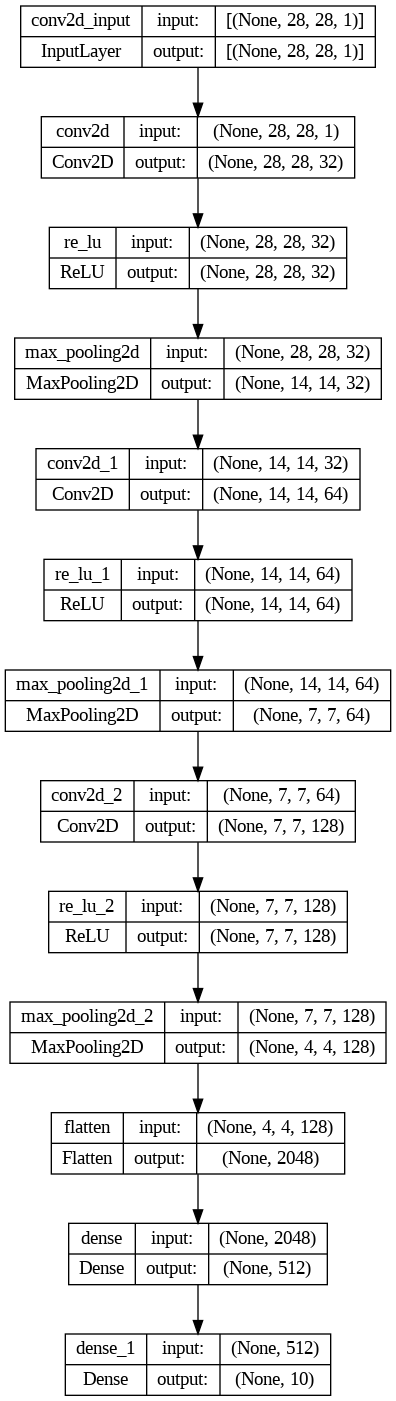

In [22]:
plot_model(model, to_file='model_structure.png', show_shapes=True)

# Train the model

- The x parameter should receive the training images.
- The y parameter should receive the training labels.
- The validation_data parameter should receive the validation data (the data we use with train_test_split).
- The epochs parameter should receive the number of epochs in the model, you can make it 1 it is ok.
    Note : You can increase the epochs, this will decrease the loss, but the loss will stop decreasing in sometimes.
- Make the verbose parameter 1.

In [23]:
history = model.fit(
    train_images, train_labels, batch_size=batch_size,
    epochs=epochs, verbose=1, validation_data=(val_images, val_labels)
)

Epoch 1/10
188/188 [==============================] - 103s 545ms/step - loss: 0.6630 - accuracy: 0.7516 - val_loss: 0.4265 - val_accuracy: 0.8461
Epoch 2/10
188/188 [==============================] - 98s 520ms/step - loss: 0.3611 - accuracy: 0.8679 - val_loss: 0.3271 - val_accuracy: 0.8806
Epoch 3/10
188/188 [==============================] - 98s 520ms/step - loss: 0.2977 - accuracy: 0.8899 - val_loss: 0.3326 - val_accuracy: 0.8737
Epoch 4/10
188/188 [==============================] - 98s 524ms/step - loss: 0.2588 - accuracy: 0.9035 - val_loss: 0.3061 - val_accuracy: 0.8892
Epoch 5/10
188/188 [==============================] - 98s 519ms/step - loss: 0.2321 - accuracy: 0.9134 - val_loss: 0.2809 - val_accuracy: 0.8941
Epoch 6/10
188/188 [==============================] - 99s 527ms/step - loss: 0.2086 - accuracy: 0.9216 - val_loss: 0.2661 - val_accuracy: 0.8982
Epoch 7/10
188/188 [==============================] - 103s 545ms/step - loss: 0.1884 - accuracy: 0.9303 - val_loss: 0.2372 - val_

# Evaluate the model on the test data

- Use evaluate function to find the performance of the model.
- The x parameter should receive the testing images (the testing images we get from the dataset).
- The y parameter should receive the testing labels.
- You need to print the metric you choose before and the loss values.

In [24]:
Evaluate = model.evaluate(test_data,test_labels_one_hot)
print("Test Loss", round(Evaluate[0], 4))
print("Test Accuracy", round(Evaluate[1],4))

313/313 [==============================] - 6s 19ms/step - loss: 0.2964 - accuracy: 0.9016
Test Loss 0.2964
Test Accuracy 0.9016


# Make predictions on the test data

- Just print the first ten predictions and compare them with the actual values.

In [25]:
predictions = model.predict(test_data)

313/313 [==============================] - 7s 23ms/step


In [26]:
first_10_predictions = predictions[:10]
first_10_actual_values = test_labels_one_hot[:10]
print(first_10_predictions)

[[6.37761621e-09 2.10049478e-11 2.79871994e-11 1.93234821e-11
  4.29081954e-13 2.05692822e-06 1.12716003e-09 8.80116568e-06
  3.50051588e-09 9.99989092e-01]
 [5.36518528e-05 3.23950276e-11 9.99903619e-01 2.34954900e-09
  1.54805111e-05 4.46487042e-10 2.71360750e-05 2.83833530e-11
  1.70264618e-11 1.78952342e-09]
 [7.80947289e-08 9.99999821e-01 1.32158584e-09 2.94433411e-09
  3.72815223e-10 3.06986048e-10 1.49633383e-09 2.00111303e-13
  5.13147476e-11 1.07193317e-11]
 [4.80632201e-09 9.99999940e-01 4.23859177e-11 3.48136431e-09
  2.59622324e-11 2.09284326e-11 3.21407678e-10 1.92854410e-14
  2.52189735e-13 1.20977794e-12]
 [3.74271092e-03 1.03498776e-09 1.03248050e-04 5.05042908e-06
  4.90734601e-06 1.68209358e-08 9.96144056e-01 1.20327135e-08
  1.01225552e-08 2.20977192e-08]
 [4.29342708e-06 9.99995053e-01 5.48009439e-07 1.69156866e-08
  4.46854642e-08 7.92666099e-10 1.28900979e-08 2.61906937e-11
  1.19188917e-08 5.77514772e-11]
 [4.10368948e-08 1.98294936e-09 5.25240228e-03 5.45321255e

In [27]:
for i in range(len(first_10_predictions)):
  predicted_label = np.argmax(first_10_predictions[i])
  true_label = np.argmax(first_10_actual_values[i])
  if predicted_label == true_label:
    print(f"Prediction {i+1}: Correct")
  else:
    print(f"Prediction {i+1}: Incorrect")

Prediction 1: Correct
Prediction 2: Correct
Prediction 3: Correct
Prediction 4: Correct
Prediction 5: Correct
Prediction 6: Correct
Prediction 7: Correct
Prediction 8: Correct
Prediction 9: Correct
Prediction 10: Correct


# Visualize the predictions for several examples (25 is enough).

- For each image, print the image with the actual value and predicted value.

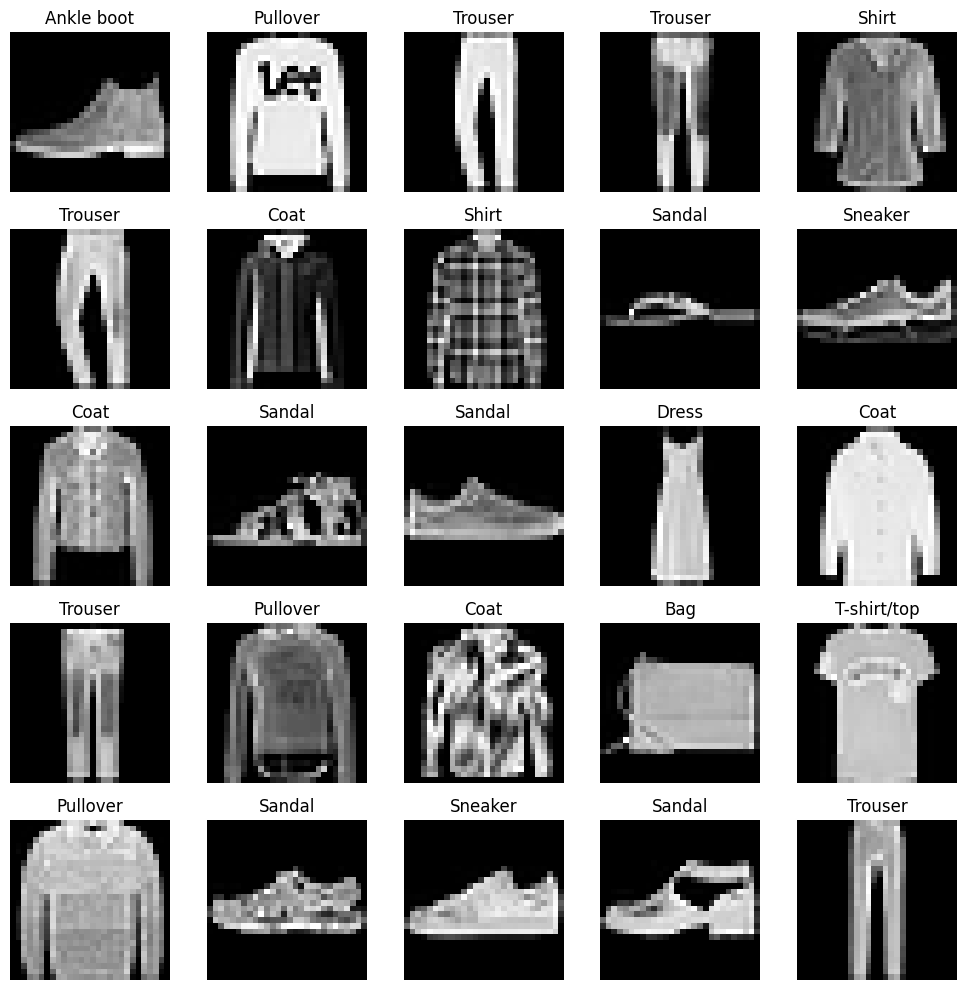

In [28]:
fig, axes = plt.subplots(5,5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    index = i*5 + j # Calculate the index of the current image
    axes[i, j].imshow(test_data[index, :, :], cmap='gray') # Plot the image
    axes[i, j].set_title(labels_fun(np.argmax(predictions[index]))) # Set the title
    axes[i, j].axis('off') # Optional: Turn off axis labels

plt.tight_layout() # Adjust the layout of subplots
plt.show()

# Save the model as pickle file

In [29]:
pickle.dump(model, open('model.pkl', 'wb'))